In [1]:
pip install missingno

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import missingno as msno
from datetime import date

from sklearn import metrics

from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/sneha/OneDrive/Desktop/Data/Car_Price_data.csv')

In [4]:
data.head(10)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
5,Maruti Wagon R VXI BS IV,3.5 Lakh*,New Car (On-Road Price) : Rs.5.16-6.94 Lakh*,2013,Individual,"35,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
6,Hyundai i10 Sportz 1.2,3.15 Lakh*,New Car (On-Road Price) : Rs.6.54-6.63 Lakh*,2013,Dealer,"40,000 kms",First Owner,Petrol,Manual,Mileage20.36 kmpl,Engine1197 CC,Max Power78.9 bhp,Seats5
7,Maruti Wagon R VXI,4.1 Lakh*,New Car (On-Road Price) : Rs.5.26-7.01 Lakh*,2018,Dealer,"17,512 kms",First Owner,Petrol,Manual,Mileage20.51 kmpl,Engine998 CC,Max Power67.04 bhp,Seats5
8,Hyundai Venue SX Plus Turbo DCT BSIV,10.5 Lakh*,New Car (On-Road Price) : Rs.7.70-13.02 Lakh*,2019,Individual,"20,000 kms",First Owner,Petrol,Automatic,Mileage18.15 kmpl,Engine998 CC,Max Power118.35 bhp,Seats5
9,Mahindra TUV 300 T6,5.75 Lakh*,NaN,2017,Dealer,"70,000 kms",First Owner,Diesel,Manual,Mileage18.49 kmpl,Engine1493 CC,Max Power100 bhp,Seats7


<AxesSubplot:>

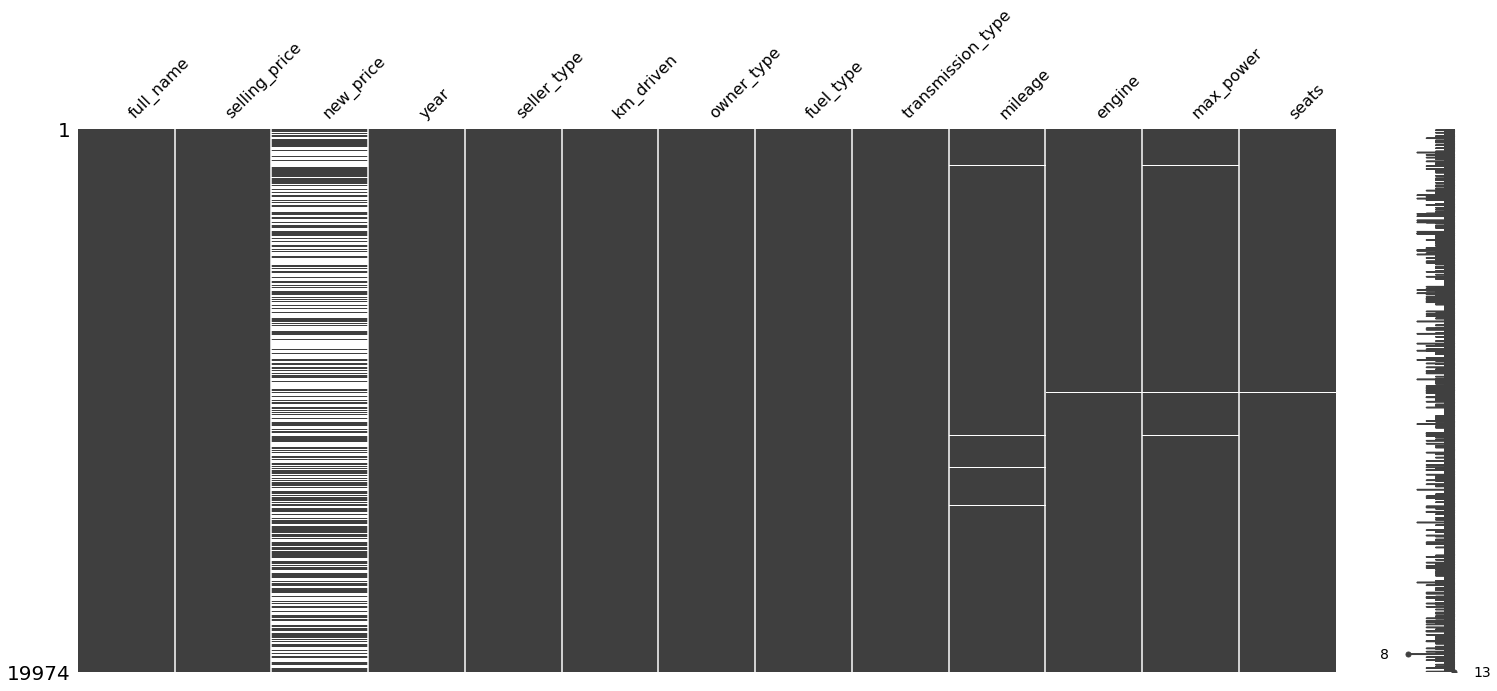

In [5]:
msno.matrix(data)

Since, most of the values from the 'new_price' column are missing, it is better to drop that column entirely.
The missing values from 'mileage','engine', 'max_power', and 'seats' are quite less in comparison to our data size so it is better to delete those rows.

In [6]:
data.drop('new_price',axis = 1, inplace = True)

In [7]:
data.dropna(axis = 0, inplace = True)

In [8]:
data.isnull().sum()

full_name            0
selling_price        0
year                 0
seller_type          0
km_driven            0
owner_type           0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 19973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19542 non-null  object
 1   selling_price      19542 non-null  object
 2   year               19542 non-null  int64 
 3   seller_type        19542 non-null  object
 4   km_driven          19542 non-null  object
 5   owner_type         19542 non-null  object
 6   fuel_type          19542 non-null  object
 7   transmission_type  19542 non-null  object
 8   mileage            19542 non-null  object
 9   engine             19542 non-null  object
 10  max_power          19542 non-null  object
 11  seats              19542 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


## EDA

# selling_price (Target Column)

Converting the lakh and crore to their digit equivalent

In [10]:
data['price'] = data['selling_price'].apply(lambda x: str(float(x.split(" ")[0]) * 100000) if "Lakh" in x else x)
data['price'] = data['price'].apply(lambda x: str(float(x.split(" ")[0]) * 10000000) if "Cr" in x else x)
data['price'] = data['price'].apply(lambda x: str(float(x.replace("*","").replace(",",""))) if "," in x else x)

In [11]:
data['price'] = pd.to_numeric(data['price'])

# year

In [12]:
data['age_of_car'] = date.today().year - data['year'] 

# km_driven

In [13]:
data['kms_driven'] = data['km_driven'].apply(lambda x: int(x.split(" ")[0].replace(",","")))

# mileage, engine, max_power, seats

In [14]:
data['Mileage'] = data['mileage'].apply(lambda x: float(x[7:].split(" ")[0]))
data['Engine'] = data['engine'].apply(lambda x: int(x[6:].split(" ")[0]))
data['MaxPower'] = data['max_power'].apply(lambda x: float(x[9:].split(" ")[0]))
data['Seats'] = data['seats'].apply(lambda x: int(x[5:]))

In [15]:
data.drop(['selling_price','full_name','year','km_driven','mileage','engine','max_power','seats'],axis = 1, inplace = True)

In [16]:
data

,seller_type,owner_type,fuel_type,transmission_type,price,age_of_car,kms_driven,Mileage,Engine,MaxPower,Seats
0,Individual,First Owner,Petrol,Manual,120000.0,10,120000,19.70,796,46.30,5
1,Individual,First Owner,Petrol,Manual,550000.0,6,20000,18.90,1197,82.00,5
2,Individual,First Owner,Petrol,Manual,215000.0,12,60000,17.00,1197,80.00,5
3,Individual,First Owner,Petrol,Manual,226000.0,10,37000,20.92,998,67.10,5
4,Dealer,First Owner,Diesel,Manual,570000.0,7,30000,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...
19969,Dealer,First Owner,Diesel,Manual,650000.0,5,69480,23.59,1364,67.05,5
19970,Dealer,First Owner,Petrol,Manual,925000.0,3,18000,17.50,1373,91.10,7
19971,Dealer,First Owner,Diesel,Manual,425000.0,7,67000,21.14,1498,103.52,5
19972,Dealer,First Owner,Diesel,Manual,1225000.0,6,3800000,16.00,2179,140.00,7


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_type        19542 non-null  object 
 1   owner_type         19542 non-null  object 
 2   fuel_type          19542 non-null  object 
 3   transmission_type  19542 non-null  object 
 4   price              19542 non-null  float64
 5   age_of_car         19542 non-null  int64  
 6   kms_driven         19542 non-null  int64  
 7   Mileage            19542 non-null  float64
 8   Engine             19542 non-null  int64  
 9   MaxPower           19542 non-null  float64
 10  Seats              19542 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.8+ MB


Printing unique values for each column

In [18]:
for i in data.columns:
    print(i,":",len(data[i].unique()))

seller_type : 3
owner_type : 1
fuel_type : 5
transmission_type : 2
price : 1195
age_of_car : 26
kms_driven : 4431
Mileage : 529
Engine : 161
MaxPower : 480
Seats : 9


In [19]:
data.owner_type.value_counts()

First Owner    19542
Name: owner_type, dtype: int64

Since the owner_type has only one value throughout the dataset, it is better to drop the column entirely

In [20]:
data.drop('owner_type',axis = 1, inplace = True)

# Numerical data

In [21]:
num_f = ['price','age_of_car','kms_driven','Mileage','Engine','MaxPower','Seats']

Checking if the data has standard normal distribution

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


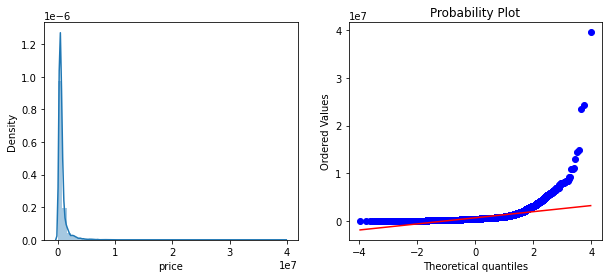

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


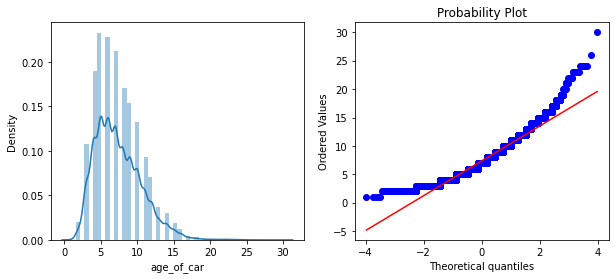

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


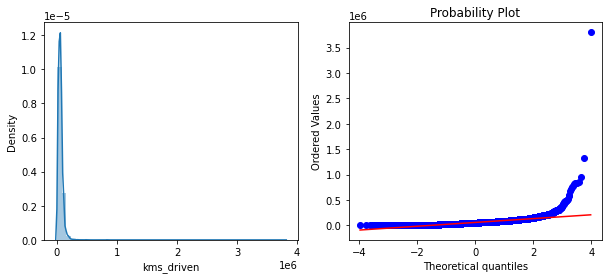

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


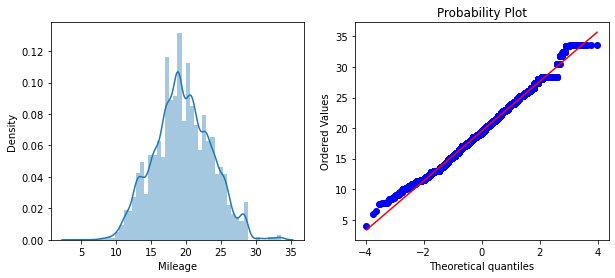

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


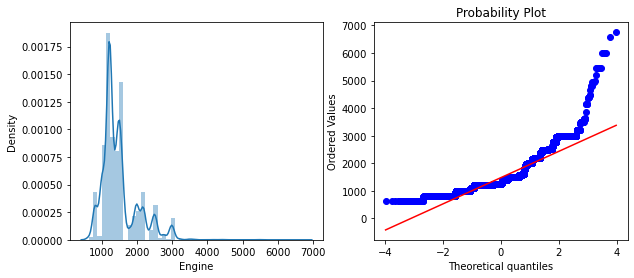

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


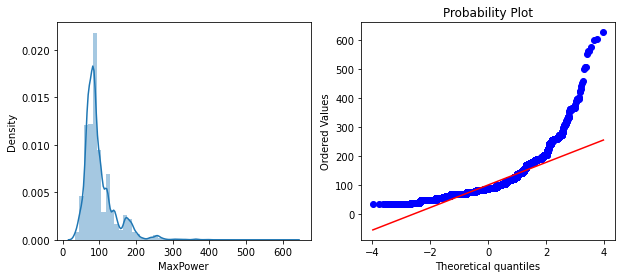

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


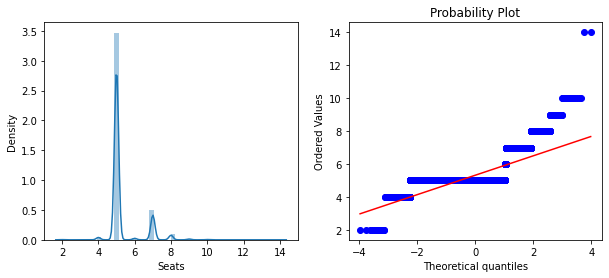

In [22]:
for i in num_f:
    figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    sns.distplot(data[i], ax = axis[0])
    stats.probplot(data[i], dist = 'norm',plot = plt)
    plt.show()

# Chi square test

In [23]:
for i in num_f:
    chi_test = stats.chisquare(data[i])
    print(i, 'has normal distribution with pvalue:', chi_test.pvalue) if chi_test.pvalue > 0.05 else print(i, 'doesn\'t have normal distribution with pvalue:', chi_test.pvalue) 

price doesn't have normal distribution with pvalue: 0.0
age_of_car doesn't have normal distribution with pvalue: 2.1867568921283063e-210
kms_driven doesn't have normal distribution with pvalue: 0.0
Mileage has normal distribution with pvalue: 1.0
Engine doesn't have normal distribution with pvalue: 0.0
MaxPower doesn't have normal distribution with pvalue: 0.0
Seats has normal distribution with pvalue: 1.0


Taking log transformations since all of our data is positively skewed

In [24]:
data['price_log'] = np.log(data['price'])
data['age_log'] = np.log(data['age_of_car'])
data['kms_driven_log'] = np.log(data['kms_driven'])
data['engine_log'] = np.log(data['Engine'])
data['max_power_log'] = np.log(data['MaxPower'])

In [25]:
num_f = ['price_log','age_log','kms_driven_log','Mileage','engine_log','max_power_log','Seats']

Replotting

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


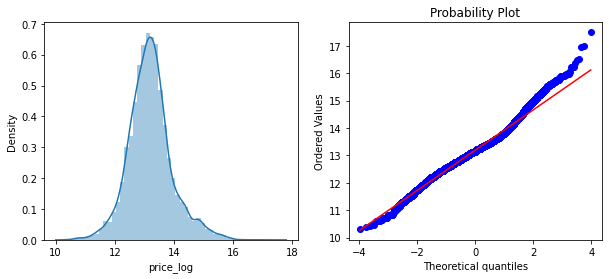

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


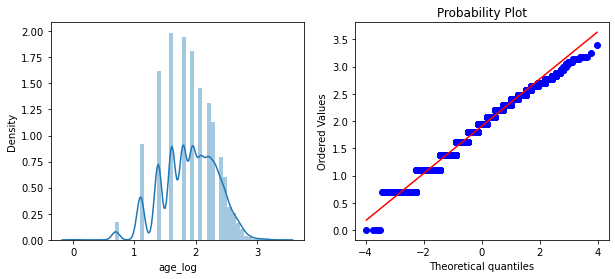

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


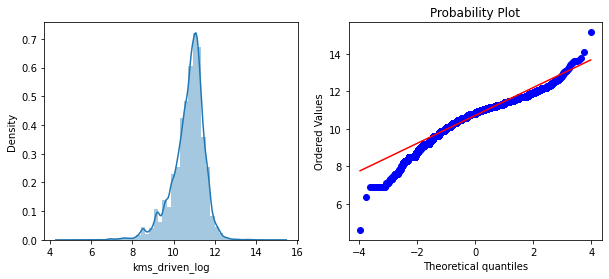

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


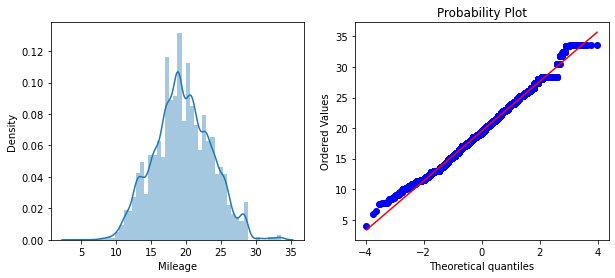

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


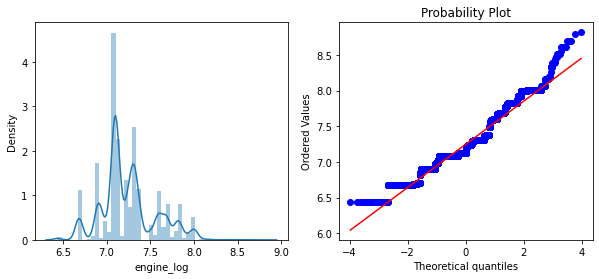

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


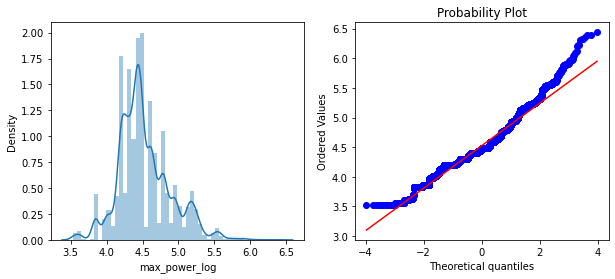

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


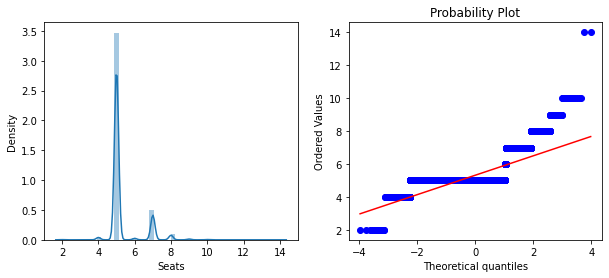

In [26]:
for i in num_f:
    figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    sns.distplot(data[i], ax = axis[0])
    stats.probplot(data[i], dist = 'norm',plot = plt)
    plt.show()

In [27]:
for i in num_f:
    chi_test = stats.chisquare(data[i])
    print(i, 'has normal distribution with pvalue:', chi_test.pvalue) if chi_test.pvalue > 0.05 else print(i, 'doesn\'t have normal distribution with pvalue:', chi_test.pvalue) 

price_log has normal distribution with pvalue: 1.0
age_log has normal distribution with pvalue: 1.0
kms_driven_log has normal distribution with pvalue: 1.0
Mileage has normal distribution with pvalue: 1.0
engine_log has normal distribution with pvalue: 1.0
max_power_log has normal distribution with pvalue: 1.0
Seats has normal distribution with pvalue: 1.0


In [28]:
data.drop(['age_of_car','kms_driven','Engine','MaxPower'], axis = 1, inplace = True)

In [29]:
data.head()

,seller_type,fuel_type,transmission_type,price,Mileage,Seats,price_log,age_log,kms_driven_log,engine_log,max_power_log
0,Individual,Petrol,Manual,120000.0,19.70,5,11.695247,2.302585,11.695247,6.679599,3.835142
1,Individual,Petrol,Manual,550000.0,18.90,5,13.217674,1.791759,9.903488,7.087574,4.406719
2,Individual,Petrol,Manual,215000.0,17.00,5,12.278393,2.484907,11.002100,7.087574,4.382027
3,Individual,Petrol,Manual,226000.0,20.92,5,12.328290,2.302585,10.518673,6.905753,4.206184
4,Dealer,Diesel,Manual,570000.0,22.77,5,13.253392,1.945910,10.308953,7.311886,4.590970


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,19542.0,743067.468427,909046.471706,30000.000000,349000.000000,525000.000000,788500.000000,3.950000e+07
Mileage,19542.0,19.508373,4.075127,4.000000,16.950000,19.300000,22.320000,3.354000e+01
Seats,19542.0,5.322638,0.838068,2.000000,5.000000,5.000000,5.000000,1.400000e+01
price_log,19542.0,13.197669,0.742399,10.308953,12.762827,13.171154,13.577887,1.749181e+01
age_log,19542.0,1.906814,0.437834,0.000000,1.609438,1.945910,2.197225,3.401197e+00
kms_driven_log,19542.0,10.721342,0.766400,4.605170,10.341742,10.849337,11.198228,1.515051e+01
engine_log,19542.0,7.247184,0.311219,6.436150,7.087574,7.129298,7.366445,8.817594e+00
max_power_log,19542.0,4.526154,0.365503,3.532226,4.303254,4.463607,4.731098,6.439350e+00


# Categorical data

Checking the categorical features

In [31]:
cat_f = ['seller_type','fuel_type','transmission_type']

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


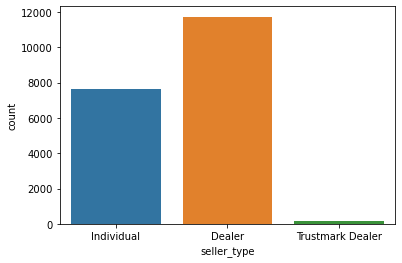

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


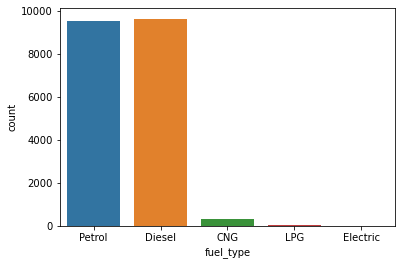

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


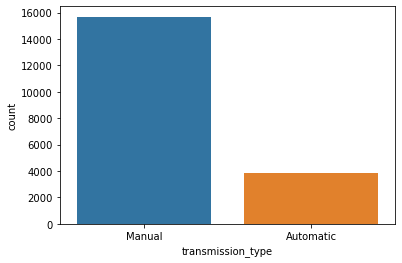

In [32]:
for i in cat_f:
    sns.countplot(data[i])
    plt.show()

# Categorical features vs target column ('price')

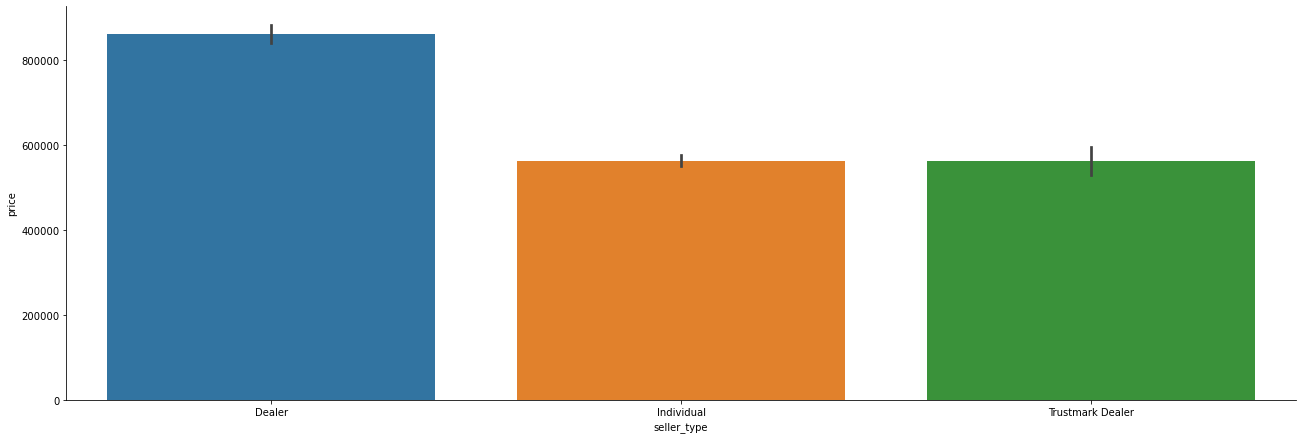

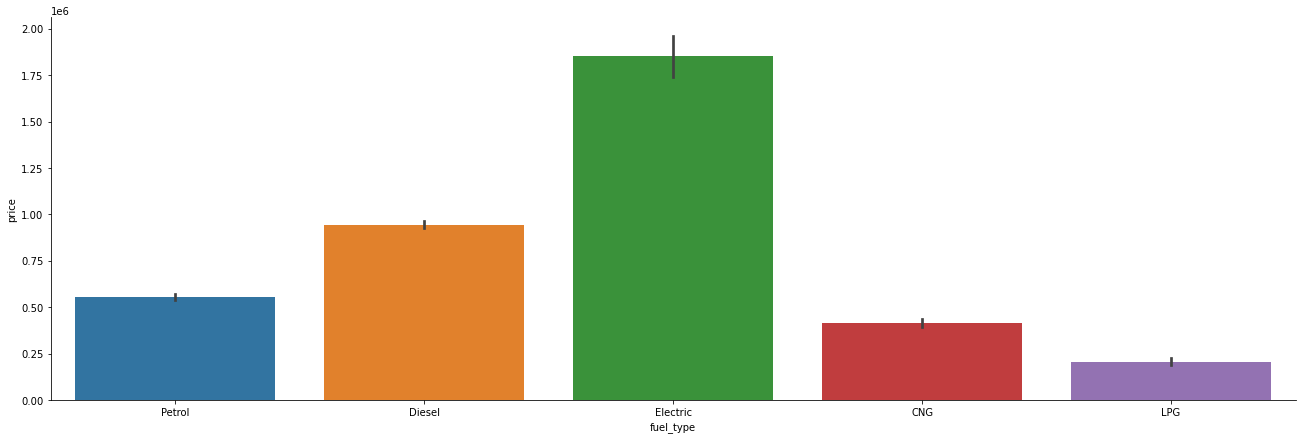

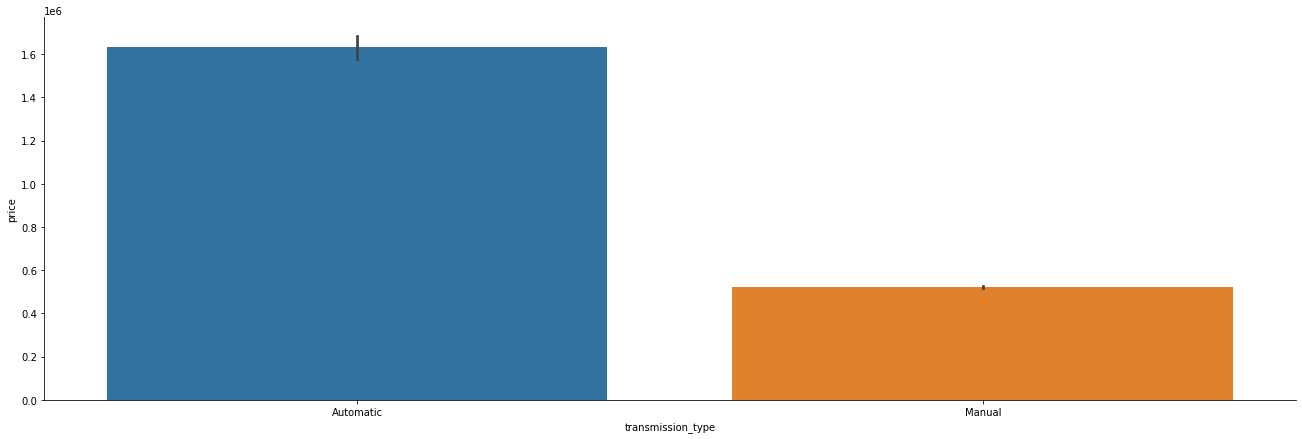

In [33]:
for i in cat_f:
    sns.catplot(y = 'price', x = i, data = data.sort_values("price", ascending = False), kind = "bar",height = 6, aspect =3)

In [34]:
for i in cat_f:
    group = data.groupby(by = i)
    print(group.first().sort_values('price',ascending = True))

                 fuel_type transmission_type     price  Mileage  Seats  \
seller_type                                                              
Individual          Petrol            Manual  120000.0    19.70      5   
Trustmark Dealer       CNG            Manual  410000.0    26.60      5   
Dealer              Diesel            Manual  570000.0    22.77      5   

                  price_log   age_log  kms_driven_log  engine_log  \
seller_type                                                         
Individual        11.695247  2.302585       11.695247    6.679599   
Trustmark Dealer  12.923912  1.386294       10.882509    6.905753   
Dealer            13.253392  1.945910       10.308953    7.311886   

                  max_power_log  
seller_type                      
Individual             3.835142  
Trustmark Dealer       4.063198  
Dealer                 4.590970  
                seller_type transmission_type      price  Mileage  Seats  \
fuel_type                            

# Ordinal Encoding

In [35]:
fuel = ['LPG','CNG','Petrol','Diesel','Electric']
oe = OrdinalEncoder(categories = [fuel])
data['fuel_enc'] = oe.fit_transform(data[['fuel_type']])

In [36]:
transmission = ['Manual','Automatic']
oe = OrdinalEncoder(categories = [transmission])
data['transmission_enc'] = oe.fit_transform(data[['transmission_type']])

# One hot Encoding

In [37]:
seller = data[['seller_type']]
seller = pd.get_dummies(seller, drop_first = True)

In [38]:
data.drop(['fuel_type','transmission_type','seller_type'],axis = 1, inplace = True)

In [39]:
data = pd.concat([seller,data],axis = 1)

In [40]:
data.head()

,seller_type_Individual,seller_type_Trustmark Dealer,price,Mileage,Seats,price_log,age_log,kms_driven_log,engine_log,max_power_log,fuel_enc,transmission_enc
0,1,0,120000.0,19.70,5,11.695247,2.302585,11.695247,6.679599,3.835142,2.0,0.0
1,1,0,550000.0,18.90,5,13.217674,1.791759,9.903488,7.087574,4.406719,2.0,0.0
2,1,0,215000.0,17.00,5,12.278393,2.484907,11.002100,7.087574,4.382027,2.0,0.0
3,1,0,226000.0,20.92,5,12.328290,2.302585,10.518673,6.905753,4.206184,2.0,0.0
4,0,0,570000.0,22.77,5,13.253392,1.945910,10.308953,7.311886,4.590970,3.0,0.0


# Feature Selection

<AxesSubplot:>

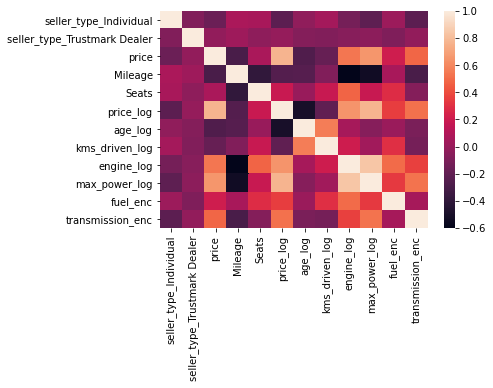

In [41]:
sns.heatmap(data.corr())

In [42]:
X = data.drop(['price','price_log'], axis = 1)
y = data.loc[:,'price_log']

In [43]:
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[8.36965651e-03 1.39451993e-04 3.06915057e-02 1.44162110e-02
 2.48322247e-01 4.18277647e-02 1.32148024e-01 2.86353502e-01
 3.81647904e-02 1.99566846e-01]


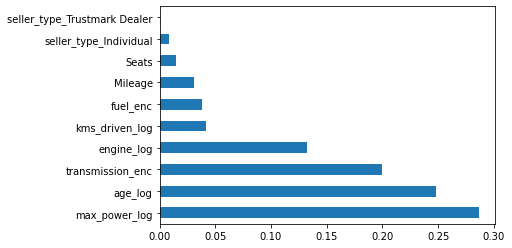

In [45]:
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

# Model Building

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [47]:
print(X_train.shape,X_test.shape)

(13093, 10) (6449, 10)


In [48]:
X.columns

Index(['seller_type_Individual', 'seller_type_Trustmark Dealer', 'Mileage',
       'Seats', 'age_log', 'kms_driven_log', 'engine_log', 'max_power_log',
       'fuel_enc', 'transmission_enc'],
      dtype='object')

We are not scaling the dataset as it is not required in Random Forest

# Random Forest 

In [49]:
rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print('R^2 :' , metrics.r2_score(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 : 0.9221900287163978
RMSE : 0.2047496621307019


In [50]:
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.3)
results = cross_val_score(rfr, X, y, cv = ssplit)
print(results)
print('Cross validation score: ',np.mean(results))

[0.92606336 0.92746824 0.9224064  0.92498429 0.92826508 0.93033724
 0.91936825 0.92312079 0.92423501 0.92510146]
Cross validation score:  0.9251350108027984


# Hyper Parameter Tuning

In [51]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [56]:
y_prediction = rf_random.predict(X_test)

In [57]:
print('R^2 :', metrics.r2_score(y_test,y_prediction))

R^2 : 0.9264133435640604


In [58]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_prediction))
print('RMSE :',RMSE)

RMSE : 0.19911551500562974


In [59]:
RMSE /( max(y) - min(y))

0.027720929360726152

# Saving the model

In [60]:
import pickle

In [61]:
filename = 'model.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [62]:
model = pickle.load(open(filename, 'rb'))
y_prediction = model.predict(X_test)
print(np.exp(y_prediction))

[ 254166.99724138  224845.10088134  762579.1260306  ... 1053391.3554496
  552219.16172561  466806.41819698]


In [63]:
metrics.r2_score(y_test,y_prediction)

0.9221900287163978